In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import os
#import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

import torch
import torchvision
import torchvision.transforms as transforms

In [2]:

df1 = pd.read_csv('CATrecon.csv')
df2 = pd.read_csv('CATlabels.csv')

X = df1.values
y = df2.values

n = 899707
display(df1)
display(df2)

X = np.reshape(X, (n,13,21,1))

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,cotAlpha,cotBeta
0,308.048248,-2.456686,0.0,-0.988944,-0.016691,0.147350,59937,-6.711530,-0.113275
1,269.400848,-17.547522,0.0,-0.979427,0.002897,0.201779,39834,-4.853959,0.014357
2,-114.661781,-10.762573,0.0,0.920735,0.021547,0.389593,28121,2.363325,0.055306
3,373.618835,-14.498341,0.0,-0.985751,0.034938,0.164541,44496,-5.990914,0.212336
4,70.942093,16.567095,0.0,-0.628712,-0.073535,0.774153,10819,-0.812129,-0.094988
...,...,...,...,...,...,...,...,...,...
899702,273.131226,-18.831367,0.0,-0.984207,0.026848,0.174973,55470,-5.624908,0.153441
899703,100.958321,6.795188,0.0,-0.921760,0.075785,0.380283,18110,-2.423879,0.199286
899704,-149.783035,-10.000488,0.0,0.961390,0.033099,0.273190,29604,3.519126,0.121157
899705,-386.694794,-9.129040,0.0,0.990921,-0.024137,0.132262,62540,7.492107,-0.182494


In [3]:
path = os.getcwd()
print(path)
if not os.path.exists('CATcotAlpha'):
    os.mkdir('CATcotAlpha')
os.chdir('CATcotAlpha')
print(os.getcwd())

/home/nqx/Abisko/SmartPixelUpdates/directional-pixel-detectors/ornl_2D_models
/home/nqx/Abisko/SmartPixelUpdates/directional-pixel-detectors/ornl_2D_models/CATcotAlpha


In [4]:
#note: labels.csv has 11 columns; you need to drop the column you don't want, and then adjust number of outputs in your NN

#df2.head()

display(df2)
df2 = df2[['cotAlpha']]
print(df2.head())
#df2.shape

#reset y since you dropped columns
y = df2.values
display(y.shape)

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,cotAlpha,cotBeta
0,308.048248,-2.456686,0.0,-0.988944,-0.016691,0.147350,59937,-6.711530,-0.113275
1,269.400848,-17.547522,0.0,-0.979427,0.002897,0.201779,39834,-4.853959,0.014357
2,-114.661781,-10.762573,0.0,0.920735,0.021547,0.389593,28121,2.363325,0.055306
3,373.618835,-14.498341,0.0,-0.985751,0.034938,0.164541,44496,-5.990914,0.212336
4,70.942093,16.567095,0.0,-0.628712,-0.073535,0.774153,10819,-0.812129,-0.094988
...,...,...,...,...,...,...,...,...,...
899702,273.131226,-18.831367,0.0,-0.984207,0.026848,0.174973,55470,-5.624908,0.153441
899703,100.958321,6.795188,0.0,-0.921760,0.075785,0.380283,18110,-2.423879,0.199286
899704,-149.783035,-10.000488,0.0,0.961390,0.033099,0.273190,29604,3.519126,0.121157
899705,-386.694794,-9.129040,0.0,0.990921,-0.024137,0.132262,62540,7.492107,-0.182494


   cotAlpha
0 -6.711530
1 -4.853959
2  2.363325
3 -5.990914
4 -0.812129


(899707, 1)

/home/nqx/spack/var/spack/environments/rocm/.spack-env/._view/imgapaatxz7hyp2qkoilbz5lvysa4ryk/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


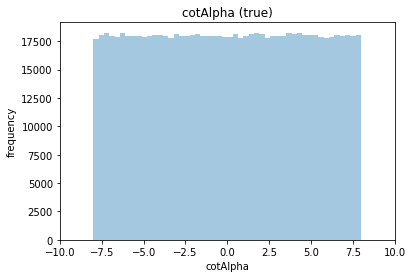

In [5]:
#histo. of true cotAlpha values
df_true_cotAlpha = pd.DataFrame(df2, columns=['cotAlpha'])
sns.distplot(df_true_cotAlpha['cotAlpha'], kde=False, bins=50)
plt.xlabel('cotAlpha')
plt.xlim([-10,10])
plt.ylabel('frequency')
plt.title("cotAlpha (true)")
plt.savefig('cotAlpha-true.png')

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import pdb

if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
#device='cpu'
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.device = torch.device(device)
        self.conv1 = nn.Conv2d(1, 16, 3, bias=True, stride=(1,1)).to(device)
        self.conv2 = nn.Conv2d(16, 32, 3, bias=True, stride=(1,1)).to(device)
        self.conv3 = nn.Conv2d(32, 64, 3, bias=True, stride=(1,1)).to(device)
        self.pool = nn.MaxPool2d(2, 2).to(device)
        self.fc1 = nn.Linear(1344, 64, bias=True).to(device)
        self.fc2 = nn.Linear(64, 1, bias=True).to(device)
        self.drop1 = nn.Dropout(0.5).to(device)

    def forward(self, x):
        #pdb.set_trace()
        #x = x.type(torch.FloatTensor)
        #x = x.to(self.device)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.drop1(x)
        x = self.fc2(x)
        #pdb.set_trace()
        return x

from torchsummary import summary
import io
from contextlib import redirect_stdout

net = Net()
with io.StringIO() as buf, redirect_stdout(buf):
    print(net)
summary(net, (1,13,21))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 11, 19]             160
            Conv2d-2            [-1, 32, 9, 17]           4,640
            Conv2d-3            [-1, 64, 7, 15]          18,496
         MaxPool2d-4             [-1, 64, 3, 7]               0
            Linear-5                   [-1, 64]          86,080
           Dropout-6                   [-1, 64]               0
            Linear-7                    [-1, 1]              65
Total params: 109,441
Trainable params: 109,441
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.13
Params size (MB): 0.42
Estimated Total Size (MB): 0.54
----------------------------------------------------------------


In [15]:
from torch.utils.data import TensorDataset, DataLoader, random_split, Subset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)
print(X.shape, y.shape)

#scale input data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
#X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1], X_test.shape[2]))

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

trainset = TensorDataset(
            torch.Tensor(X_train),
            torch.Tensor(y_train),
        )
testset = TensorDataset(
            torch.Tensor(X_test),
            torch.Tensor(y_test),
        )
batch_size = 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


(899707, 13, 21, 1) (899707, 1)
(719765, 1, 13, 21) (179942, 1, 13, 21) (719765, 1) (179942, 1)


In [ ]:
import torch.optim as optim

def mean_squared_error(y_actual, y_predicted):
    mse= torch.mean(torch.square(y_actual - y_predicted), axis=0)
    #print(y_predicted)
    #pdb.set_trace()
    return mse

def calculate_loss(net, dataset):
    inputs = torch.cat([dataset[:][0]], dim=0)
    #inputs = inputs.to(device=net.device, dtype=torch.float32)
    labels = torch.cat([dataset[:][1]], dim=0)
    #labels = labels.to(device=net.device, dtype=torch.float32)
    pred = net(inputs)
    return mean_squared_error(labels, pred)
    
torch.autograd.detect_anomaly()
from tqdm import tqdm, trange
#criterion = nn.CrossEntropyLoss()
criterion = mean_squared_error
#criterion = nn.L1Loss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-8)
n_epochs = 50
global_step = 0
val_acc = 0.0
for epoch in range(n_epochs):  # loop over the dataset multiple times
    #net.train()
    epoch_loss = 0
    with tqdm(
                total=X_train.shape[0],
                desc="Epoch {}/{}".format(epoch + 1, n_epochs),
                unit="sample",
                ascii=True,
                dynamic_ncols=True,
            ) as pbar:
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device=net.device, dtype=torch.float32)
            labels = labels.to(device=net.device, dtype=torch.float32)
            
            # zero the parameter gradients
            optimizer.zero_grad()

            # Perform forward pass
            pred = net(inputs)
            
            # Compute loss
            loss = criterion(labels, pred)
            
            #if i==2:
            #    pdb.set_trace()
            epoch_loss += loss.item()
            #writer.add_scalar("Loss/train", loss.item(), global_step)
            
            # Perform backward pass
            loss.backward()
            
            # Perform optimization
            optimizer.step()
            global_step += 1
            #pdb.set_trace()
            pbar.set_postfix(
                        **{
                            "batch training loss": loss.item(),
                            "batch val loss": val_acc,
                            "epoch loss": epoch_loss,
                        }
                    )
            pbar.update(inputs.shape[0])
            #import pdb
            #pdb.set_trace()
        #val_acc = calculate_loss(net, testset).tolist()
print('Finished Training')

/tmp/ipykernel_1024319/3787934131.py:17: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  torch.autograd.detect_anomaly()
Epoch 1/50:  56%|###########################                     | 405184/719765 [00:50<00:39, 7997.69sample/s, batch training loss=nan, batch val loss=0, epoch loss=nan]

In [ ]:
#save model                                        
# serialize model to JSON                                                                                                          
                           
model_json = model.to_json()                                                                                    
with open("model.json", "w") as json_file:                                                  
  json_file.write(model_json)                                              
                           
                                                                                                                               
#save full model in hd5 format                                           
model.save('my_model.h5')

#alt. methods
#You can save History attribute of tf.keras.callbacks.History in .txt form
#with open("/content/drive/MyDrive/NN-jan28/result_model.txt",'w') a   s f:
#    for k in history.history.keys():
#        print(k,file=f)
#        for i in history.history[k]:
#            print(i,file=f)
#import pickle
#with open('/content/drive/MyDrive/NN-jan28/trainHistoryDict', 'wb') as file_pi:
#    pickle.dump(history.history, file_pi)

In [ ]:
print(len(predictions))
#df_predict = pd.DataFrame(predictions, columns=['cotAlpha', 'cotBeta'])
df_predict = pd.DataFrame(predictions, columns=['cotAlpha'])
print(df_predict)
df_predict.head()


179942
        cotAlpha
0       0.352319
1       4.892081
2       4.252152
3       1.533945
4      -1.963004
...          ...
179937  7.783632
179938  1.053969
179939 -7.696394
179940 -0.396576
179941  4.643239

[179942 rows x 1 columns]


,cotAlpha
0,0.352319
1,4.892081
2,4.252152
3,1.533945
4,-1.963004


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)
#print(X.shape, y.shape)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#df_predict = pd.DataFrame(predictions, columns=['x_entry', 'y_entry', 'z_entry', 'cotAlpha', 'cotBeta'])
print(y_test.shape)
#trueLabels = pd.DataFrame(y_test, columns=['cotAlpha', 'cotBeta'])
trueLabels = pd.DataFrame(y_test, columns=['cotAlpha'])


(179942, 1)


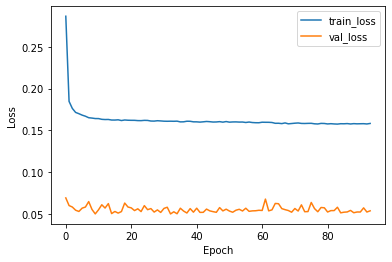

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('loss.png')


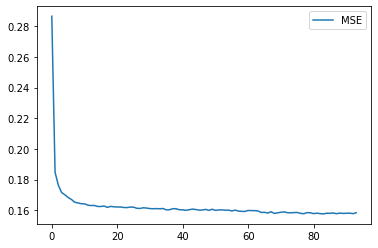

In [ ]:
plt.plot(history.history['mean_squared_error'], label='MSE')
plt.legend(loc='upper right')
plt.savefig('mse.png')

In [ ]:
df_predict.to_csv('predictions.csv')

In [ ]:
trueLabels.to_csv('trueLabels.csv')